<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/K_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Maching learning/Regresión: Valor numérico/datos_exportados (1).csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29593 entries, 0 to 29592
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   29593 non-null  float64
 1   Map                          29593 non-null  int64  
 2   Team                         29593 non-null  int64  
 3   InternalTeamId               29593 non-null  float64
 4   MatchId                      29593 non-null  float64
 5   RoundId                      29593 non-null  float64
 6   RoundWinner                  29593 non-null  int64  
 7   MatchWinner                  29593 non-null  int64  
 8   Survived                     29593 non-null  int64  
 9   AbnormalMatch                29593 non-null  int64  
 10  TimeAlive                    29593 non-null  int64  
 11  TravelledDistance            29593 non-null  float64
 12  RLethalGrenadesThrown        29593 non-null  float64
 13  RNonLethalGrenad

In [ ]:
# 3. Seleccionar variables
columnas_predictoras = [
    'MatchKills',
    'MatchHeadshots',
    'TravelledDistance',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue'
]

X = df[columnas_predictoras]
y = df['Survived']

In [ ]:
# 4. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 5. Crear y entrenar modelo KNN (k=5 vecinos)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 6. Predecir
y_pred = modelo_knn.predict(X_test)

In [ ]:
# 7. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión (accuracy):", accuracy)

Precisión (accuracy): 0.5774949312908313


🟠 Eso significa que el modelo acertó en un 57.8% de los casos, lo cual es más bajo que:

Árbol de Decisión (62%)

Random Forest (62.7%)

Regresión Logística (61%)

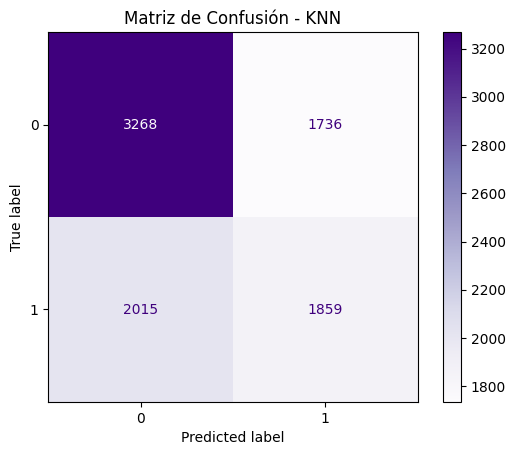

In [ ]:
# 8. Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=modelo_knn.classes_)
disp.plot(cmap='Purples')
plt.title('Matriz de Confusión - KNN')
plt.show()

El modelo KNN no logró un buen desempeño comparado con los otros modelos.
Aunque es simple, no capta bien las diferencias entre sobrevivientes y no sobrevivientes en este conjunto de datos.
Probablemente, los datos tienen mucho solapamiento o ruido, y KNN no generaliza bien en esos casos.